## Titanic dataset processing

```
TD:
Fare-outlierit (+ plottien koko)
Cleanup ylemmäs rakenteessa?
```

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression

sns.set_theme(rc={'figure.figsize':(5,4)})

In [0]:
train_data = spark.sql('SELECT * FROM kayttaja_teemu_rama.tt_train').toPandas()
# train_data = pd.read_csv('train.csv', sep=";")
display(train_data.iloc[:20,:])

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,null,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,null,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,null,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,null,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,null,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,null,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,null,C


###Data exploration and descriptive visualizations

Shape: (891, 12)

Numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], non-numerical columns: ['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']

Identifying categorical columns with less than ten levels:
Survived [0 1]
Pclass [3 1 2]
Sex ['male' 'female']
SibSp [1 0 3 4 2 5 8]
Parch [0 1 2 5 3 4 6]
Embarked ['S' 'C' 'Q' None]

PassengerId duplicates: 0

Nulls:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

NaN's:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
<class 'pandas.core.series.Series'>


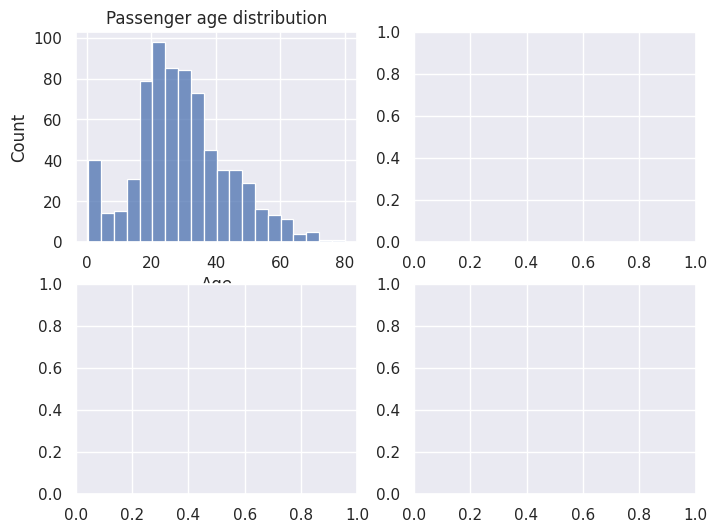

In [0]:
train_data = spark.sql('SELECT * FROM kayttaja_teemu_rama.tt_train').toPandas()
# train_data = pd.read_csv('train.csv', sep=";")

print(f"Shape: {train_data.shape}\n")
print(f"Numerical columns: {train_data.select_dtypes(include='number').columns.to_list()}, non-numerical columns: {train_data.columns.values[~np.isin(train_data.columns.values,train_data.select_dtypes(include='number').columns.to_list())]}\n")

print(f"Identifying categorical columns with less than ten levels:")

categorical = [train_data[col].nunique() < 10 for col in train_data.columns]
for col in train_data[train_data.columns[categorical]]:
    print(col, train_data[col].unique())
print()

# Check for PassengerId duplicates:

print(f"PassengerId duplicates: {len(train_data['PassengerId'])-len(train_data['PassengerId'].drop_duplicates())}\n")
train_data = train_data.set_index('PassengerId', drop=True)

# Nulls per column:

print(f"Nulls:\n{train_data.isnull().sum()}\n")
print(f"NaN's:\n{train_data.isna().sum()}")

# Ikä histogrammina, lähtösatama, hyttiluokka, selviytyneiden määrä

fig, axs = plt.subplots(2,2, figsize=(8,6))
sns.histplot(data=train_data, x="Age", color="b", ax=axs[0,0])
axs[0,0].set_title('Passenger age distribution')
#axs[0,1].hist(train_data["Embarked"])

print(type(train_data["Embarked"][:10]))

plt.show()

# axs[0,1].hist(naiset.sort_values()[:195], bins=25, color='r')
# axs[0,1].set_title('Histogrammi / naiset')

# sm.qqplot(miehet, line='q', ax=axs[1,0])
# axs[1,0].set_title('QQ-plot / miehet')

#sns.histplot(data=train_data, x="Fare", color="g", ax=axs_2[0])


# x = list(df.value_counts("Sex"))
# y1 = df[df["Survived"] == 0].value_counts("Sex").index.to_list()
# y2 = df[df["Survived"] == 1].value_counts("Sex").index.to_list()

# sns:n displotilla helpompi bar-stack?

# plt.bar(y1, x, color="r")
# plt.bar(y2, x, color="b")
# plt.show()


# fig, axs = plt.subplots(2,2, figsize=(10,7))


# axs[0,0].set_title('Histogrammi / miehet')


# plt.bar(x=list(df.value_counts("Sex").index.values), height=df.value_counts("Sex").to_list())
# plt.show()

###Possible correlations between survival and other variables
A closer inspection if any of the other variables (e.g. cabin class or port of embarkation) correlated with survival rate

###Data cleanup

In [0]:
# Decode "Sex" to bool:

train_data["Sex_bool"] = train_data["Sex"].replace({'male': 0, 'female': 1})

# Deduce column "Deck" from "Cabin":

train_data["Deck"] = train_data["Cabin"].str[0]

train_data = train_data[['Pclass', 'Name','Sex', 'Sex_bool', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Deck', 'Cabin', 'Embarked', 'Survived']]

#### Handling missing values

Cabin (and Deck) column has by far the most missing values (687/891, 77 %). As the datatype is str, no median or similar value can be used for filling. These values are (currently) left as-is and not considered as an explanatory variable. Note: predicting deck based on other variables (class?)?

Age also has a significant amount of missing values. For these, the median value for age is used to fill those missing.

Two dataframes are created: *df_age_dropped* drops all rows with missing value for age. *df_age_median* uses the median to fill these as described.

####Removing outliers

Columns Age and Fare are explored.<br> 
**Age:** Z-score > 3 returns two passengers (aged 80 and 74). As these ages are plausible, no rows are dropped.<br>
**Fare**: 20 rows with fares from 211 to 512 have Z-score > 3. These rows are dropped as the median fare for first class tickets is 60.

Rows with Age Z-score > 3:



Pclass,Name,Sex,Sex_bool,Age,SibSp,Parch,Ticket,Fare,Deck,Cabin,Embarked,Survived
1,"Barkworth, Mr. Algernon Henry Wilson",male,0,80.0,0,0,27042,30.0,A,A23,S,1
3,"Svensson, Mr. Johan",male,0,74.0,0,0,347060,7.775,null,null,S,0


Median fare for first class tickets: 60.29

Rows with Fare Z-score > 3:



Pclass,Name,Sex,Sex_bool,Age,SibSp,Parch,Ticket,Fare,Deck,Cabin,Embarked,Survived
1,"Fortune, Mr. Charles Alexander",male,0,19.0,3,2,19950,263.0,C,C23 C25 C27,S,0
1,"Fortune, Miss. Mabel Helen",female,1,23.0,3,2,19950,263.0,C,C23 C25 C27,S,1
1,"Baxter, Mr. Quigg Edmond",male,0,24.0,0,1,PC 17558,247.5208,B,B58 B60,C,0
1,"Ward, Miss. Anna",female,1,35.0,0,0,PC 17755,512.3292,null,null,C,1
1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,1,50.0,0,1,PC 17558,247.5208,B,B58 B60,C,1
1,"Ryerson, Miss. Emily Borie",female,1,18.0,2,2,PC 17608,262.375,B,B57 B59 B63 B66,C,1
1,"Fortune, Miss. Alice Elizabeth",female,1,24.0,3,2,19950,263.0,C,C23 C25 C27,S,1
1,"Widener, Mr. Harry Elkins",male,0,27.0,0,2,113503,211.5,C,C82,C,0
1,"Bidois, Miss. Rosalie",female,1,42.0,0,0,PC 17757,227.525,null,null,C,1
1,"Fortune, Mr. Mark",male,0,64.0,1,4,19950,263.0,C,C23 C25 C27,S,0


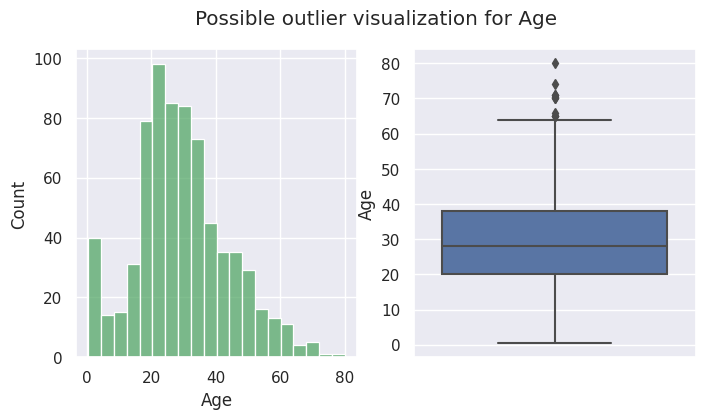

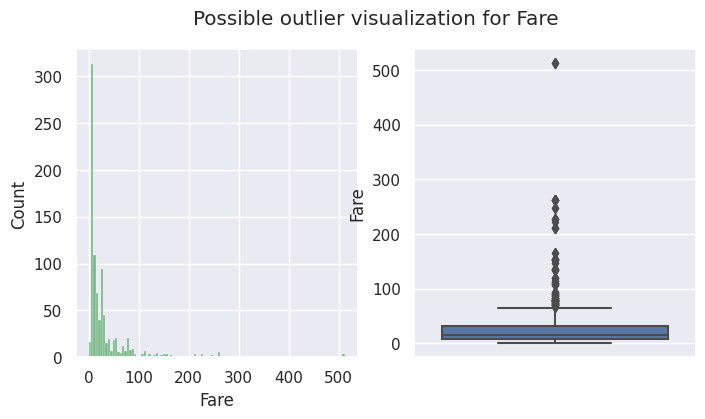

In [0]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
fig.suptitle("Possible outlier visualization for Age")
sns.histplot(data=train_data, x="Age", color="g", ax=axs[0])
sns.boxplot(y=train_data["Age"])

age_outliers = train_data[np.abs(stats.zscore(train_data['Age'], nan_policy = 'omit')) > 3]
print("Rows with Age Z-score > 3:\n")
display(age_outliers)

fig_2, axs_2 = plt.subplots(1, 2, figsize=(8,4))
fig_2.suptitle("Possible outlier visualization for Fare")
sns.histplot(data=train_data, x="Fare", color="g", ax=axs_2[0])
sns.boxplot(y=train_data["Fare"])

fare_outliers = train_data[np.abs(stats.zscore(train_data['Fare'], nan_policy = 'omit')) > 3]
print(f"Median fare for first class tickets: {round(np.median(train_data['Fare'][train_data['Pclass'] == 1]), 2)}\n")
print("Rows with Fare Z-score > 3:\n")
display(fare_outliers)


In [0]:
# Dump:

# Tähän subplot histogrammeja ikä, sukupuoli, luokka, kansi?

#plt.hist(df["Age"], bins=30)
# plt.bar(x=list(df.value_counts("Survived").index.values), height=df.value_counts("Survived").to_list())
# plt.show()

# Seuraavaan voisi laittaa samoja mutta erotella selviytynyt-statuksen perusteella

# Malli:

# 



# axs[0,1].hist(naiset.sort_values()[:195], bins=25, color='r')
# axs[0,1].set_title('Histogrammi / naiset')

# sm.qqplot(miehet, line='q', ax=axs[1,0])
# axs[1,0].set_title('QQ-plot / miehet')

# sm.qqplot(naiset, line='q', markerfacecolor='r', markeredgecolor='r', ax=axs[1,1])
# axs[1,1].set_title('QQ-plot / naiset')

# plt.show()